In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [23]:
df = pd.read_csv('winequality-red.csv').dropna()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


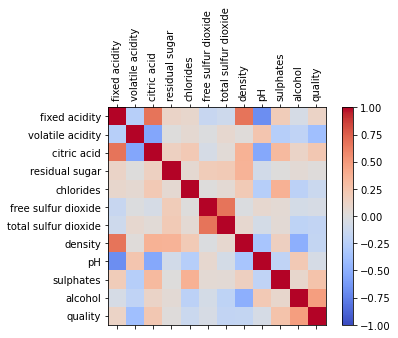

In [22]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [31]:
#df2 = df.drop(['volatile acidity','citric acid'], axis=1)
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [32]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

In [33]:
sc = StandardScaler()
scaler = sc.fit(train_x)
trainx_scaled = scaler.transform(train_x)
testx_scaled = scaler.transform(test_x)

In [36]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(500,250,100),
                       max_iter = 1000, activation = 'relu',
                       solver = 'adam')
mlp_clf.fit(trainx_scaled, train_y)

MLPClassifier(hidden_layer_sizes=(500, 250, 100), max_iter=1000)

In [39]:
y_pred = mlp_clf.predict(testx_scaled)
print('Accuracy: {:.2f}'.format(accuracy_score(test_y,y_pred)))

Accuracy: 0.61


C:\Users\bubbacole\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


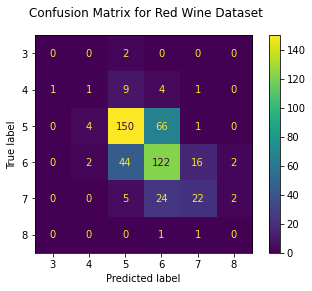

In [42]:
fig = plot_confusion_matrix(mlp_clf,testx_scaled, test_y)
fig.figure_.suptitle('Confusion Matrix for Red Wine Dataset')
plt.show()





In [8]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.67      0.75      0.71       209
           6       0.59      0.54      0.56       184
           7       0.57      0.56      0.56        68
           8       0.00      0.00      0.00         7

    accuracy                           0.61       480
   macro avg       0.30      0.31      0.31       480
weighted avg       0.60      0.61      0.60       480



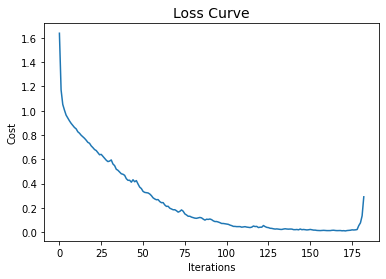

In [43]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [10]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}



In [ ]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainx_scaled, train_y)

print(grid.best_params_) 

In [ ]:
grid_predictions = grid.predict(testx_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(test_y, grid_predictions)))